Covid-19 India

Dataset link: https://drive.google.com/file/d/17iEVwRvuI33IXQL1oQjmozZj68-53Yaf/view?usp=sharing


Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization.




COVID-19 cases at daily level is present in covid_19_india.csv file

Individual level details are present in IndividualDetails.csv file 

Population at state level is present in population_india_census2011.csv file

Number of COVID-19 tests at daily level in ICMRTestingDetails.csv file

Number of hospital beds in each state in present in HospitalBedsIndia.csv




Predict how well can the 21 day lockdown perform in containing the spread of the virus?






Acknowledgement - 




https://www.mohfw.gov.in/

https://www.covid19india.org/

http://portal.covid19india.org/

https://pib.gov.in/PressReleasePage.aspx?PRID=1539877

https://www.kaggle.com/sudalairajkumar/covid19-in-india

In [252]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [253]:
df_age=pd.read_csv('AgeGroupDetails.csv')
df_covid=pd.read_csv('covid_19_india.csv')
df_hbi=pd.read_csv('HospitalBedsIndia.csv')
df_td=pd.read_csv('ICMRTestingDetails.csv')
df_tl=pd.read_csv('ICMRTestingLabs.csv')
df_id=pd.read_csv('IndividualDetails.csv')
df_pop=pd.read_csv('population_india_census2011.csv')

In [254]:
df_age.shape #there is no null values in this data dataset


(10, 4)

In [255]:
df_covid.isnull().sum()

Sno                         5
Date                        5
Time                        5
State/UnionTerritory        5
ConfirmedIndianNational     5
ConfirmedForeignNational    5
Cured                       5
Deaths                      5
Confirmed                   5
dtype: int64

In [256]:
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [257]:
df_covid.loc[pd.isna(df_covid["Sno"]), :].index

Int64Index([801, 802, 803, 804, 805], dtype='int64')

In [258]:
df_covid.loc[pd.isna(df_covid["Date"]), :].index

Int64Index([801, 802, 803, 804, 805], dtype='int64')

In [259]:
df_covid.loc[pd.isna(df_covid["Time"]), :].index

Int64Index([801, 802, 803, 804, 805], dtype='int64')

As the whole row is nan in the data set we will straight away drop that rows

In [260]:
df_covid.drop([801, 802, 803, 804, 805],inplace=True)

In [261]:
df_covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [262]:
df_hbi.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [263]:
df_hbi.isnull().sum()

Sno                                  1
State/UT                             1
NumPrimaryHealthCenters_HMIS         1
NumCommunityHealthCenters_HMIS       1
NumSubDistrictHospitals_HMIS         8
NumDistrictHospitals_HMIS            1
TotalPublicHealthFacilities_HMIS     1
NumPublicBeds_HMIS                   1
NumRuralHospitals_NHP18              1
NumRuralBeds_NHP18                   1
NumUrbanHospitals_NHP18              1
NumUrbanBeds_NHP18                   1
Unnamed: 12                         38
Unnamed: 13                         38
dtype: int64

In [264]:
df_hbi.loc[pd.isna(df_hbi["Sno"]), :].index

Int64Index([37], dtype='int64')

In [265]:
df_hbi.loc[pd.isna(df_hbi["State/UT"]), :].index

Int64Index([37], dtype='int64')

In [266]:
df_hbi['State/UT'].unique()


array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All India', nan], dtype=object)

In [267]:
df_hbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      30 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
 12  Unnamed: 1

In hospital beds in india data set one State/UT is missing will drop that rows too

In [268]:
df_hbi.drop(37,inplace=True)

In [269]:
df_hbi.isnull().sum()

Sno                                  0
State/UT                             0
NumPrimaryHealthCenters_HMIS         0
NumCommunityHealthCenters_HMIS       0
NumSubDistrictHospitals_HMIS         7
NumDistrictHospitals_HMIS            0
TotalPublicHealthFacilities_HMIS     0
NumPublicBeds_HMIS                   0
NumRuralHospitals_NHP18              0
NumRuralBeds_NHP18                   0
NumUrbanHospitals_NHP18              0
NumUrbanBeds_NHP18                   0
Unnamed: 12                         37
Unnamed: 13                         37
dtype: int64

In [270]:
df_hbi['NumSubDistrictHospitals_HMIS']

0       NaN
1        31
2       NaN
3        14
4        33
5         1
6        12
7         1
8       NaN
9         9
10        2
11       44
12       24
13       61
14      NaN
15       13
16      147
17       82
18        2
19       72
20      101
21        1
22      NaN
23        3
24      NaN
25       27
26        5
27       47
28       64
29        1
30      310
31       47
32       12
33      NaN
34       19
35       70
36    1,255
Name: NumSubDistrictHospitals_HMIS, dtype: object

As hospital cannoit be intereger will put mode in the nan values

In [271]:
df_hbi['NumSubDistrictHospitals_HMIS'].mode()

0    1
dtype: object

In [272]:
df_hbi['NumSubDistrictHospitals_HMIS']=df_hbi['NumSubDistrictHospitals_HMIS'].replace(np.nan, 1)

In [273]:
df_hbi['NumSubDistrictHospitals_HMIS']

0         1
1        31
2         1
3        14
4        33
5         1
6        12
7         1
8         1
9         9
10        2
11       44
12       24
13       61
14        1
15       13
16      147
17       82
18        2
19       72
20      101
21        1
22        1
23        3
24        1
25       27
26        5
27       47
28       64
29        1
30      310
31       47
32       12
33        1
34       19
35       70
36    1,255
Name: NumSubDistrictHospitals_HMIS, dtype: object

In [274]:
df_hbi.drop(['Unnamed: 12','Unnamed: 13'],axis=1)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1.0,Andaman & Nicobar Islands,27,4,1,3,34,1246,27.0,575.0,3.0,500.0
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0
2,3.0,Arunachal Pradesh,122,62,1,15,199,2320,208.0,2136.0,10.0,268.0
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0
5,6.0,Chandigarh,40,2,1,4,47,3756,0.0,0.0,4.0,778.0
6,7.0,Chhattisgarh,813,166,12,32,1023,14354,169.0,5070.0,45.0,4342.0
7,8.0,Dadra & Nagar Haveli,9,2,1,1,13,568,10.0,273.0,1.0,316.0
8,9.0,Daman & Diu,4,2,1,2,8,298,5.0,240.0,0.0,0.0
9,10.0,Delhi,534,25,9,47,615,20572,0.0,0.0,109.0,24383.0


df_hbi dataset is also cleaned with no junk values 

In [275]:
df_td.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


In [276]:
df_td.isnull().sum()

SNo                        0
DateTime                   0
TotalSamplesTested         3
TotalIndividualsTested    14
TotalPositiveCases         5
Source                    15
dtype: int64

In [277]:
df_td.shape

(24, 6)

As more than 50% of the data is nan will drop the column TotalIndividualsTested   Source                     

In [278]:
df_td=df_td.drop(['Source','TotalIndividualsTested'],axis=1)

In [279]:
df_td['TotalSamplesTested'].fillna(df_td['TotalSamplesTested'].mean(),inplace=True)
df_td['TotalPositiveCases'].fillna(df_td['TotalPositiveCases'].mean(),inplace=True)

In [280]:
df_td.head(20)

,SNo,DateTime,TotalSamplesTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.000000,78.000000
1,2,18/03/20 18:00,13125.000000,150.000000
2,3,19/03/20 18:00,14175.000000,182.000000
3,4,20/03/20 18:00,15404.000000,236.000000
4,5,21/03/20 18:00,16911.000000,315.000000
5,6,22/03/20 18:00,18127.000000,396.000000
6,7,23/03/20 20:00,20707.000000,471.000000
7,8,24/03/20 20:00,22694.000000,536.000000
8,9,25/03/20 20:00,25144.000000,581.000000
9,10,26/03/20 20:00,52007.047619,1906.263158


In [281]:
df_td.isnull().sum()

SNo                   0
DateTime              0
TotalSamplesTested    0
TotalPositiveCases    0
dtype: int64

In [282]:
df_tl.isnull().sum()

lab        0
address    0
pincode    0
city       0
state      0
type       0
dtype: int64

so both of the above data set is cleaned

In [283]:
df_id.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [284]:
df_id.isnull().sum()

id                       0
government_id         5513
diagnosed_date           0
age                   5747
gender                5149
detected_city         5899
detected_district     1349
detected_state           0
nationality           5647
current_status           1
status_change_date     110
notes                 1190
dtype: int64

In [285]:
df_id.shape

(6821, 12)

will drop the columns 'government_id','ag','gender','detected_city','nationality' as more than 70% of the data is missing

In [286]:
df_id=df_id.drop(['government_id','age','gender','detected_city','nationality'],axis=1)

In [287]:
df_id.isnull().sum()

id                       0
diagnosed_date           0
detected_district     1349
detected_state           0
current_status           1
status_change_date     110
notes                 1190
dtype: int64

In [288]:
df_id['detected_district'].mode()

0    Mumbai
dtype: object

In [289]:
df_id['detected_district']=df_id['detected_district'].replace(np.nan,'Mumbai')

In [290]:
df_id['status_change_date'].mode()

0    09/04/2020
dtype: object

In [291]:
df_id['status_change_date']=df_id['status_change_date'].replace(np.nan,'09/04/2020')

In [292]:
df_id['current_status'].mode()

0    Hospitalized
dtype: object

In [293]:
df_id['current_status']=df_id['current_status'].replace(np.nan,'Hospitalized')

In [294]:
df_id['notes'].mode()

0    Details awaited
dtype: object

In [295]:
df_id['notes']=df_id['notes'].replace(np.nan,'Details awaited')

In [296]:
df_id.isnull().sum()

id                    0
diagnosed_date        0
detected_district     0
detected_state        0
current_status        0
status_change_date    0
notes                 0
dtype: int64

In [297]:
df_pop.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [298]:
df_pop.shape

(36, 8)

In [299]:
df_pop.isnull().sum()

Sno                        0
State / Union Territory    0
Population                 0
Rural population           0
Urban population           0
Area                       0
Density                    0
Gender Ratio               0
dtype: int64

All the data sets are clean now 

### Reading Data

In [300]:
df_age.head(2)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%


In [301]:
df_covid.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0


In [302]:
df_id.head(2)

,id,diagnosed_date,detected_district,detected_state,current_status,status_change_date,notes
0,0,30/01/2020,Thrissur,Kerala,Recovered,14/02/2020,Travelled from Wuhan
1,1,02/02/2020,Alappuzha,Kerala,Recovered,14/02/2020,Travelled from Wuhan


In [303]:
df_pop.head(2)

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929


In [304]:
df_hbi.head(2)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,1,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN


In [305]:
df_td.head(2)

,SNo,DateTime,TotalSamplesTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.0,78.0
1,2,18/03/20 18:00,13125.0,150.0


In [306]:
df_tl.head(2)

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory Supported
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site


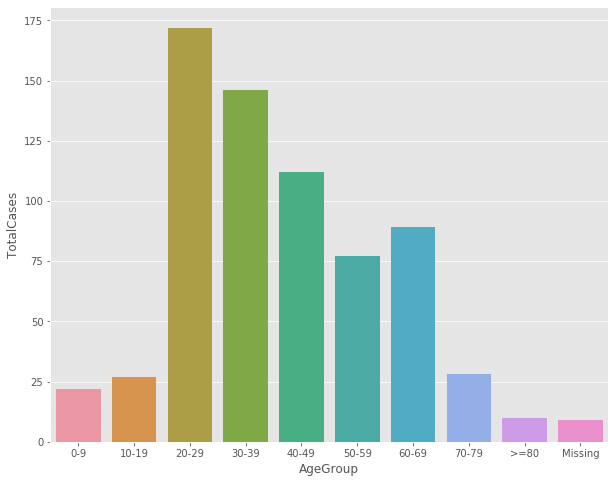

In [307]:
# lets conside the age data 
plt.figure(figsize=(10,8))
sns.barplot(data=df_age, x=df_age['AgeGroup'],y=df_age['TotalCases'])
plt.show()

As we can see the people with age group 20-29 are mostly Covid-19 positive and the age group 0-9 is the least affectd

In [308]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [309]:
df_age['Percentage']=df_age['Percentage'].str.replace('%','')

In [310]:
df_age['Percentage']=df_age['Percentage'].astype(float)

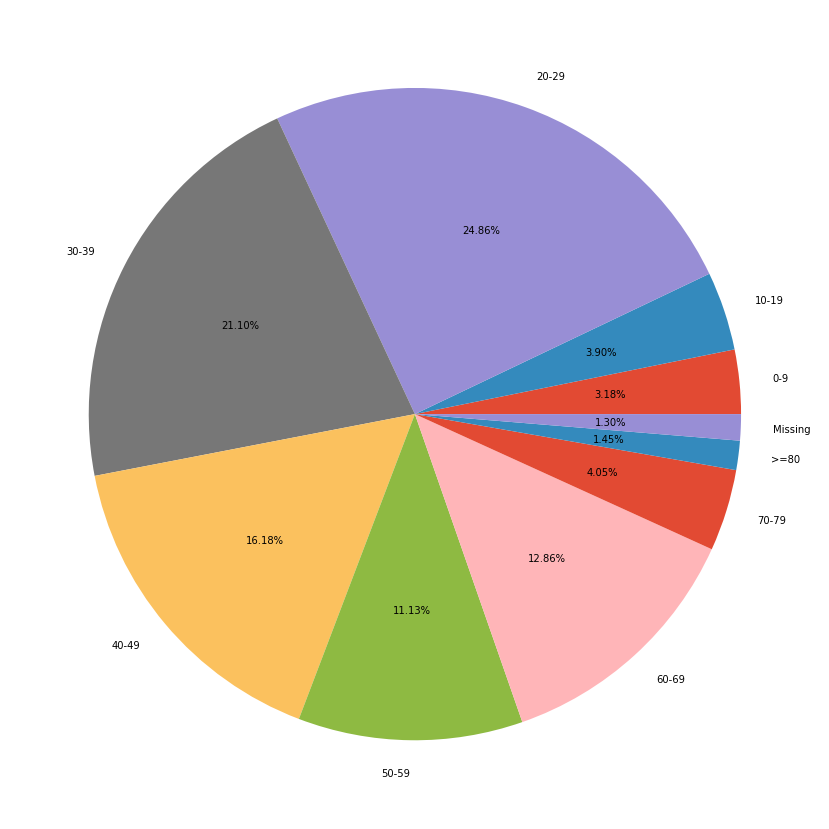

In [311]:
plt.figure(figsize=(15,15))
plt.pie(df_age['Percentage'], labels=df_age['AgeGroup'],autopct='%1.2f%%')
plt.show()

According to the data around 25% of the people areof group 20-29  and only 3% are from 0-9

In [312]:
#  now we only have one categorical value. Lets take care of it quickly.
df_age['AgeGroup']

0        0-9
1      10-19
2      20-29
3      30-39
4      40-49
5      50-59
6      60-69
7      70-79
8       >=80
9    Missing
Name: AgeGroup, dtype: object

In [313]:
age_group = df_age['AgeGroup']

In [314]:
k = 1
for i in range(len(age_group)):
    age_group[i] = k
    k += 1

In [315]:
age_group

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: AgeGroup, dtype: object

In [316]:
df_age['AgeGroup'] = age_group.astype(int)


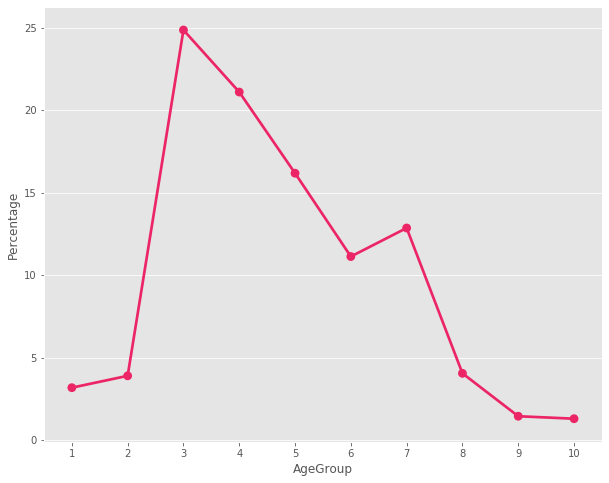

In [317]:
plt.figure(figsize=(10,8))
sns.pointplot(x=df_age['AgeGroup'], y=df_age['Percentage'], color='#EC2566')
plt.show()

In [318]:
# lets consider the hospital data 

In [319]:
df_hbi.columns

Index(['Sno', 'State/UT', 'NumPrimaryHealthCenters_HMIS',
       'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS',
       'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS',
       'NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18',
       'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [320]:
df_hbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      37 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
 12  Unnamed: 1

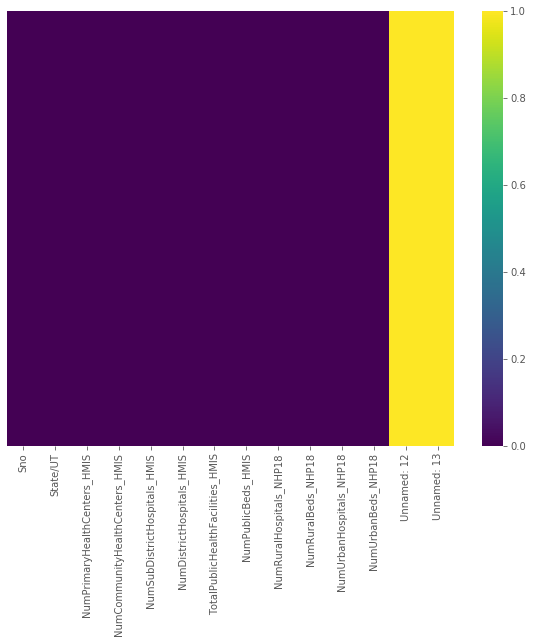

In [321]:
plt.figure(figsize=(10,8))
sns.heatmap(df_hbi.isnull(),yticklabels=False, cmap='viridis')
plt.show()

In [322]:
# will drop last 2 columns 
df_hbi=df_hbi.drop(['Unnamed: 12','Unnamed: 13'],axis=1)

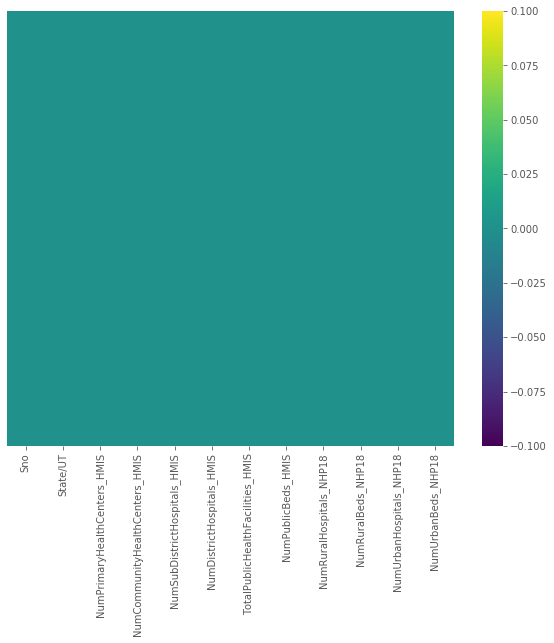

In [323]:
plt.figure(figsize=(10,8))
sns.heatmap(df_hbi.isnull(),yticklabels=False, cmap='viridis')
plt.show()

In [324]:
df_hbi['NumSubDistrictHospitals_HMIS'].describe()

count     37
unique    25
top        1
freq       7
Name: NumSubDistrictHospitals_HMIS, dtype: int64

In [325]:
df_hbi.head()


,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1.0,Andaman & Nicobar Islands,27,4,1,3,34,1246,27.0,575.0,3.0,500.0
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0
2,3.0,Arunachal Pradesh,122,62,1,15,199,2320,208.0,2136.0,10.0,268.0
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0


In [326]:
df_hbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      37 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
dtypes: float64

In [327]:
df_hbi['NumPrimaryHealthCenters_HMIS']=df_hbi['NumPrimaryHealthCenters_HMIS'].str.replace(',','')

In [328]:
df_hbi['NumPrimaryHealthCenters_HMIS']=df_hbi['NumPrimaryHealthCenters_HMIS'].astype(int)

In [329]:
df_hbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     int32  
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      37 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
dtypes: float64

In [330]:
df_hbi['NumCommunityHealthCenters_HMIS']=df_hbi['NumCommunityHealthCenters_HMIS'].str.replace(',','')

In [331]:
df_hbi['NumCommunityHealthCenters_HMIS']=df_hbi['NumCommunityHealthCenters_HMIS'].astype(int)

In [332]:
df_hbi['NumSubDistrictHospitals_HMIS']=df_hbi['NumSubDistrictHospitals_HMIS'].str.replace(',','')

In [333]:
df_hbi['NumSubDistrictHospitals_HMIS'].fillna(df_hbi['NumSubDistrictHospitals_HMIS'].mode()[0],inplace=True)

In [334]:
df_hbi['NumSubDistrictHospitals_HMIS']=df_hbi['NumSubDistrictHospitals_HMIS'].astype(int)

In [335]:
df_hbi['NumDistrictHospitals_HMIS'].unique()

array(['3', '20', '15', '33', '43', '4', '32', '1', '2', '47', '37', '28',
       '29', '23', '42', '53', '51', '70', '9', '13', '11', '35', '174',
       '55', '1,003'], dtype=object)

In [336]:
df_hbi['TotalPublicHealthFacilities_HMIS'].unique()

array(['34', '1666', '199', '1220', '2146', '47', '1023', '13', '8',
       '615', '40', '2236', '683', '671', '818', '558', '2943', '1297',
       '10', '1867', '3239', '114', '180', '87', '166', '1799', '53',
       '742', '3139', '32', '2581', '932', '157', '4122', '383', '1905',
       '37,725'], dtype=object)

In [337]:
df_hbi['NumPublicBeds_HMIS'].unique()

array(['1246', '60799', '2320', '19115', '17796', '3756', '14354', '568',
       '298', '20572', '2666', '41129', '13841', '8706', '11342', '7404',
       '56333', '39511', '250', '38140', '68998', '2562', '4585', '2312',
       '1944', '16497', '4462', '13527', '51844', '1145', '72616',
       '17358', '4895', '58310', '6660', '51163', '7,39,024'],
      dtype=object)

In [338]:
df_hbi['NumDistrictHospitals_HMIS']=df_hbi['NumDistrictHospitals_HMIS'].str.replace(',','')
df_hbi['TotalPublicHealthFacilities_HMIS']=df_hbi['TotalPublicHealthFacilities_HMIS'].str.replace(',','')
df_hbi['NumPublicBeds_HMIS']=df_hbi['NumPublicBeds_HMIS'].str.replace(',','')

In [339]:
df_hbi['NumDistrictHospitals_HMIS']=df_hbi['NumDistrictHospitals_HMIS'].astype(int)

In [340]:
df_hbi['TotalPublicHealthFacilities_HMIS']=df_hbi['TotalPublicHealthFacilities_HMIS'].astype(int)

In [341]:
df_hbi['NumPublicBeds_HMIS']=df_hbi['NumPublicBeds_HMIS'].astype(int)

In [342]:
df_hbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     int32  
 3   NumCommunityHealthCenters_HMIS    37 non-null     int32  
 4   NumSubDistrictHospitals_HMIS      37 non-null     int32  
 5   NumDistrictHospitals_HMIS         37 non-null     int32  
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int32  
 7   NumPublicBeds_HMIS                37 non-null     int32  
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
dtypes: float64

In [343]:
df_hbi['NumSubDistrictHospitals_HMIS'].describe()

count      37.000000
mean       68.027027
std       208.645964
min         1.000000
25%         1.000000
50%        13.000000
75%        47.000000
max      1255.000000
Name: NumSubDistrictHospitals_HMIS, dtype: float64

We see that the standard deviation is huge!! The maximum number is 1255 and the minimum is 1. Filling the missing values with mean won't be a good choice here.

In [344]:
num_cols = [col for col in df_hbi.columns
           if df_hbi[col].dtype!='object' and col != 'Sno']

In [345]:
num_cols

['NumPrimaryHealthCenters_HMIS',
 'NumCommunityHealthCenters_HMIS',
 'NumSubDistrictHospitals_HMIS',
 'NumDistrictHospitals_HMIS',
 'TotalPublicHealthFacilities_HMIS',
 'NumPublicBeds_HMIS',
 'NumRuralHospitals_NHP18',
 'NumRuralBeds_NHP18',
 'NumUrbanHospitals_NHP18',
 'NumUrbanBeds_NHP18']

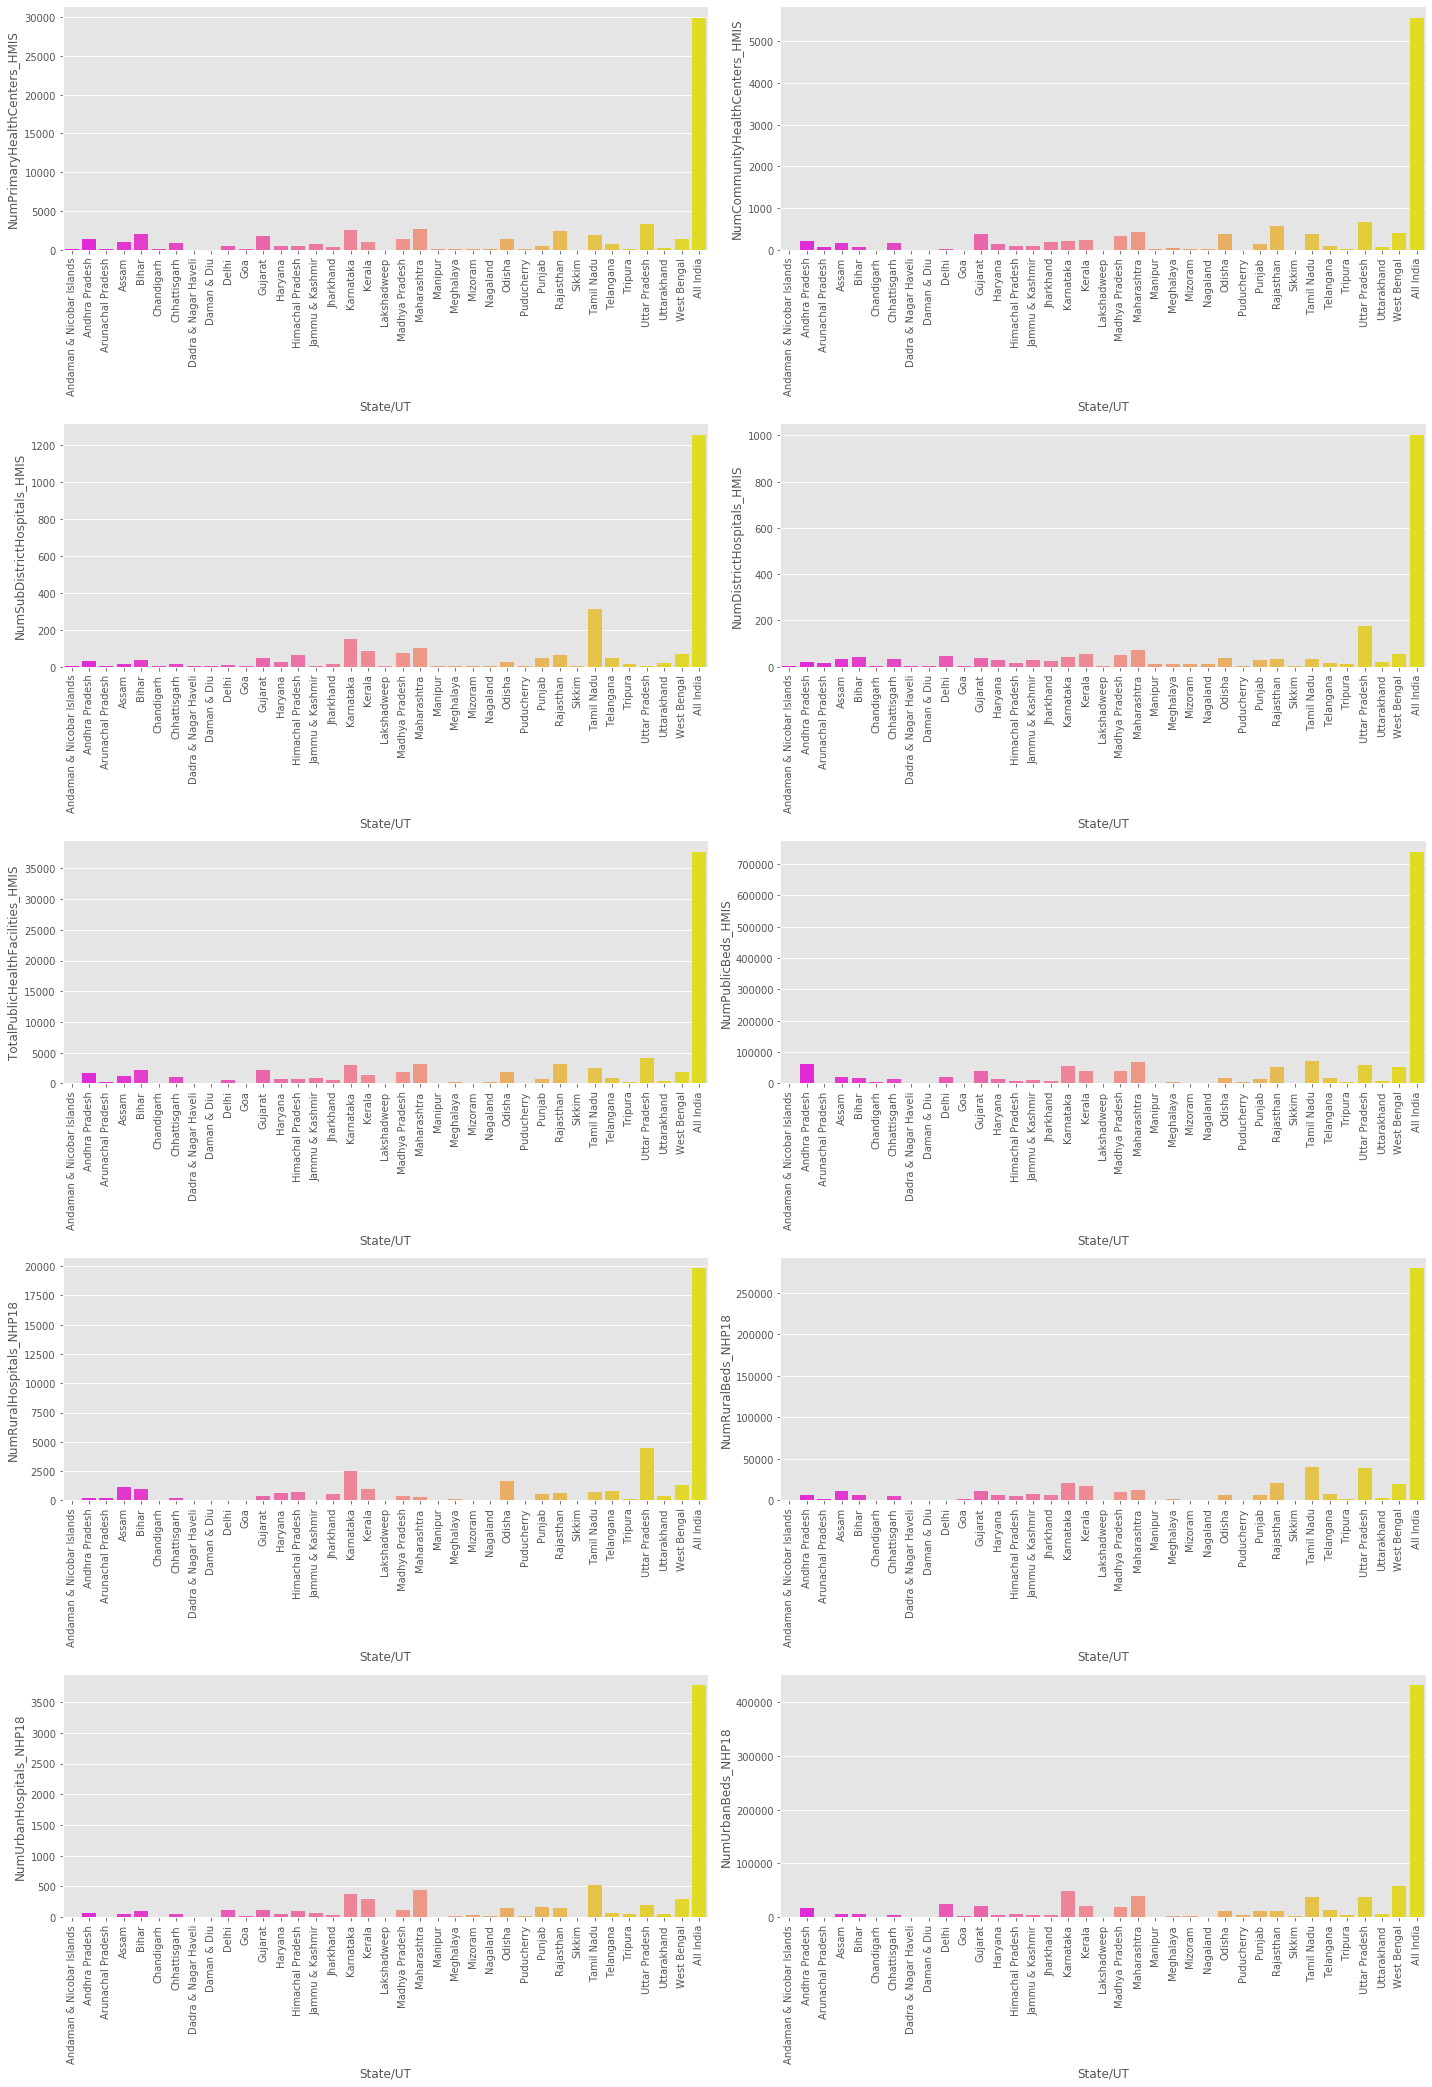

In [346]:
fig = plt.figure(figsize=(20, 50))
for i in range(len(num_cols)):
    fig.add_subplot(9, 2, i+1)
    sns.barplot(x=df_hbi['State/UT'], y=df_hbi[num_cols[i]], palette='spring')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

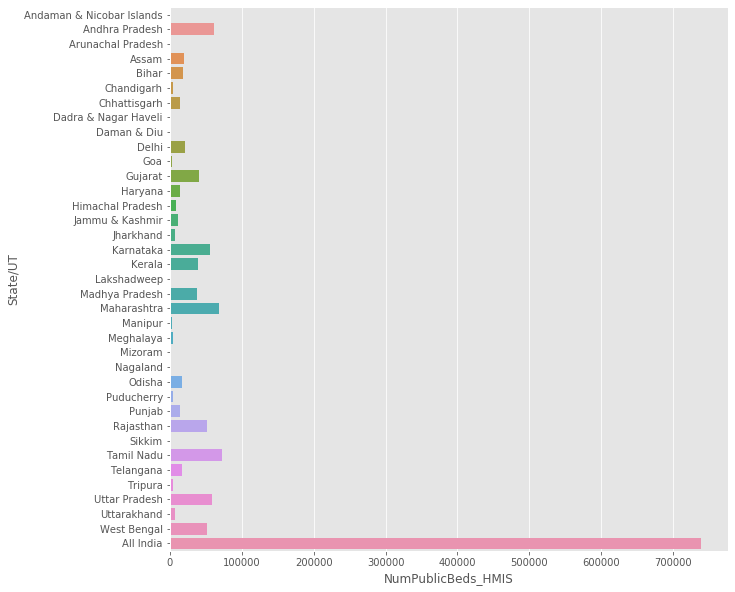

In [347]:
plt.figure(figsize=(10,10))
sns.barplot(y=df_hbi['State/UT'],x=df_hbi['NumPublicBeds_HMIS'])
plt.show()

In [348]:
df_hbi[['State/UT', 'NumPublicBeds_HMIS']].groupby(['State/UT']).mean().sort_values(by='NumPublicBeds_HMIS', ascending=False)

,NumPublicBeds_HMIS
State/UT,
All India,739024
Tamil Nadu,72616
Maharashtra,68998
Andhra Pradesh,60799
Uttar Pradesh,58310
Karnataka,56333
Rajasthan,51844
West Bengal,51163
Gujarat,41129


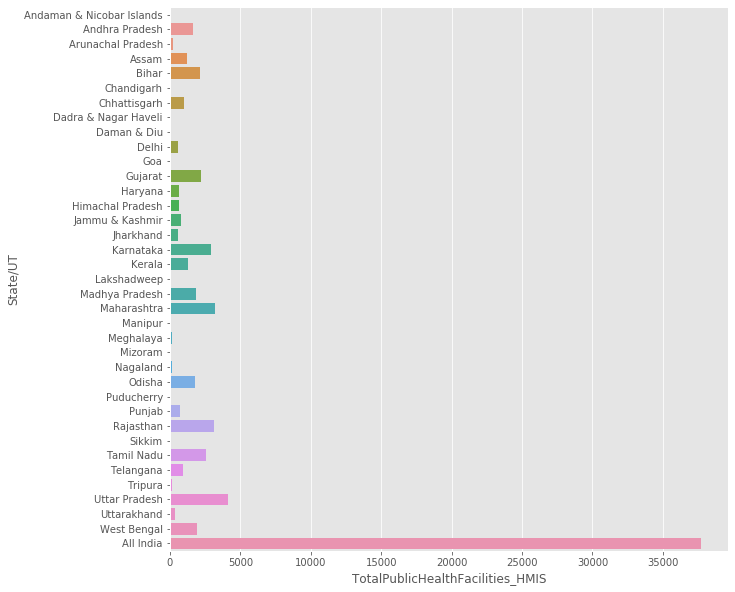

In [349]:
plt.figure(figsize=(10,10))
sns.barplot(y=df_hbi['State/UT'],x=df_hbi['TotalPublicHealthFacilities_HMIS'])
plt.show()

In [350]:
df_hbi[['State/UT', 'TotalPublicHealthFacilities_HMIS']].groupby(['State/UT']).mean().sort_values(by='TotalPublicHealthFacilities_HMIS', ascending=False)

,TotalPublicHealthFacilities_HMIS
State/UT,
All India,37725
Uttar Pradesh,4122
Maharashtra,3239
Rajasthan,3139
Karnataka,2943
Tamil Nadu,2581
Gujarat,2236
Bihar,2146
West Bengal,1905


From the data above it is quite clear that Uttar Pradesh has the most number of public health facilities in India followed by Maharashtra.

In [351]:
#now we will consider Testing labs data 
df_tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      213 non-null    object
 1   address  213 non-null    object
 2   pincode  213 non-null    int64 
 3   city     213 non-null    object
 4   state    213 non-null    object
 5   type     213 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.1+ KB


In [352]:
#so number of labs in each state
df_tl['state'].value_counts()

Maharashtra                                 30
Tamil Nadu                                  21
Karnataka                                   16
Telangana                                   16
Delhi                                       15
Kerala                                      12
Uttar Pradesh                               12
West Bengal                                 10
Gujarat                                     10
Rajasthan                                    8
Haryana                                      8
Madhya Pradesh                               7
Andhra Pradesh                               6
Assam                                        5
Jammu and Kashmir                            4
Bihar                                        4
Odisha                                       4
Uttarakhand                                  3
Jharkhand                                    2
Chhattisgarh                                 2
Chandigarh                                   2
Himachal Prad

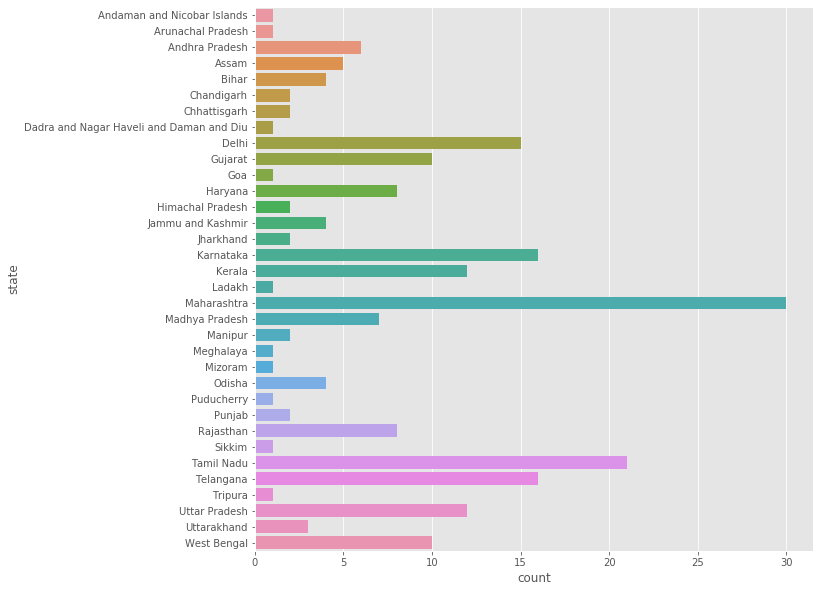

In [353]:
plt.figure(figsize=(10,10))
sns.countplot(y=df_tl['state'])
plt.show()

Type of Labs
Second, we will find out how many types of labs are present in each state.

In [354]:
df_tl['type'].unique()

array(['Government Laboratory Supported', 'Collection Site',
       'Private Laboratory', 'Government Laboratory Suitable'],
      dtype=object)

There are a total of 3 types of laboratories:

Government Laboratory
Collection Site
Private Laboratory

There are a total of 3 types of laboratories:

Government Laboratory

Collection Site

Private Laboratory

In [355]:
lab_type = df_tl[['type', 'state']].groupby(['type', 'state']).sum()
display(lab_type)

Empty DataFrame
Columns: []
Index: [(Collection Site, Arunachal Pradesh), (Collection Site, Ladakh), (Collection Site, Sikkim), (Government Laboratory Suitable, Madhya Pradesh), (Government Laboratory Suitable, Tamil Nadu), (Government Laboratory Suitable, Telangana), (Government Laboratory Suitable, West Bengal), (Government Laboratory Supported, Andaman and Nicobar Islands), (Government Laboratory Supported, Andhra Pradesh), (Government Laboratory Supported, Assam), (Government Laboratory Supported, Bihar), (Government Laboratory Supported, Chandigarh), (Government Laboratory Supported, Chhattisgarh), (Government Laboratory Supported, Dadra and Nagar Haveli and Daman and Diu), (Government Laboratory Supported, Delhi), (Government Laboratory Supported, Goa), (Government Laboratory Supported, Gujarat), (Government Laboratory Supported, Haryana), (Government Laboratory Supported, Himachal Pradesh), (Government Laboratory Supported, Jammu and Kashmir), (Government Laboratory Supported, Jharkhand), (Government Laboratory Supported, Karnataka), (Government Laboratory Supported, Kerala), (Government Laboratory Supported, Madhya Pradesh), (Government Laboratory Supported, Maharashtra), (Government Laboratory Supported, Manipur), (Government Laboratory Supported, Meghalaya), (Government Laboratory Supported, Mizoram), (Government Laboratory Supported, Odisha), (Government Laboratory Supported, Puducherry), (Government Laboratory Supported, Punjab), (Government Laboratory Supported, Rajasthan), (Government Laboratory Supported, Tamil Nadu), (Government Laboratory Supported, Telangana), (Government Laboratory Supported, Tripura), (Government Laboratory Supported, Uttar Pradesh), (Government Laboratory Supported, Uttarakhand), (Government Laboratory Supported, West Bengal), (Private Laboratory, Delhi), (Private Laboratory, Gujarat), (Private Laboratory, Haryana), (Private Laboratory, Karnataka), (Private Laboratory, Kerala), (Private Laboratory, Maharashtra), (Private Laboratory, Odisha), (Private Laboratory, Tamil Nadu), (Private Laboratory, Telangana), (Private Laboratory, Uttar Pradesh), (Private Laboratory, Uttarakhand), (Private Laboratory, West Bengal)]

In [356]:
#now lets jump to covid data 
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [357]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       801 non-null    float64
 1   Date                      801 non-null    object 
 2   Time                      801 non-null    object 
 3   State/UnionTerritory      801 non-null    object 
 4   ConfirmedIndianNational   801 non-null    object 
 5   ConfirmedForeignNational  801 non-null    object 
 6   Cured                     801 non-null    float64
 7   Deaths                    801 non-null    float64
 8   Confirmed                 801 non-null    float64
dtypes: float64(4), object(5)
memory usage: 62.6+ KB


Converting 'Date' from object to Datetime datatype.

In [358]:
date_data = df_covid[['State/UnionTerritory',"Date","Confirmed","Deaths","Cured"]]
date_data['Date'] = date_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [359]:
date_data = date_data.groupby(['Date']).sum().reset_index()


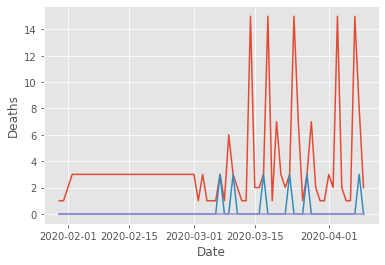

In [360]:
sns.lineplot(x=date_data['Date'],y=df_covid['Confirmed'])
sns.lineplot(x=date_data['Date'],y=df_covid['Cured'])
sns.lineplot(x=date_data['Date'],y=df_covid['Deaths'])
plt.show()

In [361]:
state_cases = df_covid.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

# Creating new columns 'Active', 'Death rate per 100' and 'Cure rate per 100'
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Cured'] + state_cases['Deaths'])
state_cases['Death rate per 100'] = np.round((100*state_cases["Deaths"]/state_cases["Confirmed"]), 2)
state_cases['Cure rate per 100'] = np.round((100*state_cases["Cured"]/state_cases["Confirmed"]), 2)

In [362]:
state_cases = state_cases.sort_values(by='Confirmed', ascending=False)
state_cases.style.bar(color='#FDD017',subset=["Confirmed"])\
                        .bar(color='red',subset=["Deaths"])\
                        .bar(color='lime',subset=["Cured"])\
                        .bar(color='mediumslateblue', subset=["Active"])\
                        .bar(color='pink', subset=["Death rate per 100"])\
                        .bar(color='lightgreen', subset=["Cure rate per 100"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death rate per 100,Cure rate per 100
18,Maharashtra,1135.000000,72.000000,117.000000,946.000000,6.340000,10.310000
25,Tamil Nadu,738.000000,8.000000,21.000000,709.000000,1.080000,2.850000
7,Delhi,669.000000,9.000000,21.000000,639.000000,1.350000,3.140000
26,Telengana,442.000000,7.000000,35.000000,400.000000,1.580000,7.920000
29,Uttar Pradesh,410.000000,4.000000,31.000000,375.000000,0.980000,7.560000
24,Rajasthan,383.000000,3.000000,21.000000,359.000000,0.780000,5.480000
1,Andhra Pradesh,348.000000,4.000000,6.000000,338.000000,1.150000,1.720000
15,Kerala,345.000000,2.000000,83.000000,260.000000,0.580000,24.060000
17,Madhya Pradesh,259.000000,16.000000,0.000000,243.000000,6.180000,0.000000
14,Karnataka,181.000000,5.000000,28.000000,148.000000,2.760000,15.470000


In [363]:
df_id.head()

,id,diagnosed_date,detected_district,detected_state,current_status,status_change_date,notes
0,0,30/01/2020,Thrissur,Kerala,Recovered,14/02/2020,Travelled from Wuhan
1,1,02/02/2020,Alappuzha,Kerala,Recovered,14/02/2020,Travelled from Wuhan
2,2,03/02/2020,Kasaragod,Kerala,Recovered,14/02/2020,Travelled from Wuhan
3,3,02/03/2020,East Delhi,Delhi,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,02/03/2020,Hyderabad,Telangana,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [364]:
df_pop.shape

(36, 8)

In [365]:
df_id.shape

(6821, 7)

In [366]:
df_covid.shape

(801, 9)

In [367]:
df_hbi.shape

(37, 12)

In [368]:
df_age.shape

(10, 4)

In [369]:
df_tl.shape

(213, 6)

In [370]:
df_td.shape

(24, 4)

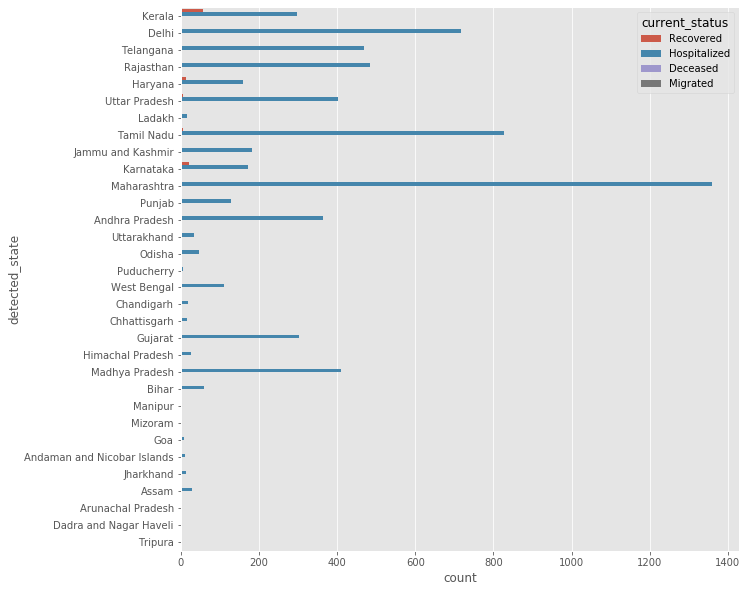

In [371]:
plt.figure(figsize=(10,10))
sns.countplot(y=df_id['detected_state'], hue=df_id['current_status'])
plt.show()

now will consider columns from different csv's

In [372]:
plt.style.use('ggplot')

In [373]:
df_covid.dropna(how='all', inplace=True)
df_covid.drop(['Sno', 'ConfirmedForeignNational', 'ConfirmedIndianNational', 'Time'], axis=1, inplace=True)
df_covid['Date'] = pd.to_datetime(df_covid['Date'], dayfirst=True)

In [374]:
df_cov = df_covid.groupby('Date')['Confirmed'].agg('sum').to_frame().reset_index()

In [382]:
# Seperating features & Target variables

X = df_cov[['Date']]
y = df_cov['Confirmed']

# Creating Days column as Dates cannot be used for polynomial regression
Days = np.arange(1, len(df_cov)+1)

In [383]:
df_cov

,Date,Confirmed
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,2.0
3,2020-02-02,3.0
4,2020-02-03,3.0
...,...,...
66,2020-04-05,3577.0
67,2020-04-06,4281.0
68,2020-04-07,4789.0
69,2020-04-08,5274.0


In [384]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [389]:
# Using polynomial regression of degree 4 to fit to our training data 
poly_features = PolynomialFeatures(degree=4)

In [390]:
poly_Days = poly_features.fit_transform(Days.reshape(-1, 1))

In [391]:
poly_reg = LinearRegression()
poly_reg.fit(poly_Days, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [392]:
poly_reg.score(poly_Days,y)

0.9900671807528596

In [397]:
y_hat = poly_reg.predict(poly_Days)

In [398]:
y_hat

array([ 2.36649220e+02,  1.46754397e+02,  7.23535482e+01,  1.20474555e+01,
       -3.55075206e+01, -7.15994400e+01, -9.74607830e+01, -1.14268450e+02,
       -1.23143762e+02, -1.25152460e+02, -1.21304707e+02, -1.12555083e+02,
       -9.98025920e+01, -8.38906564e+01, -6.56071194e+01, -4.56842446e+01,
       -2.47987160e+01, -3.57163798e+00,  1.74314648e+01,  3.77006471e+01,
        5.67815435e+01,  7.42753681e+01,  8.98389146e+01,  1.03184556e+02,
        1.14080247e+02,  1.22349518e+02,  1.27871482e+02,  1.30580831e+02,
        1.30467837e+02,  1.27578350e+02,  1.22013801e+02,  1.13931201e+02,
        1.03543139e+02,  9.11177853e+01,  7.69788888e+01,  6.15057784e+01,
        4.51333624e+01,  2.83521290e+01,  1.17081456e+01, -4.19694023e+00,
       -1.87059017e+01, -3.11059324e+01, -4.06286460e+01, -4.64500768e+01,
       -4.76906794e+01, -4.34153289e+01, -3.26333205e+01, -1.42983701e+01,
        1.26913862e+01,  4.94933919e+01,  9.73206702e+01,  1.57441824e+02,
        2.31181035e+02,  

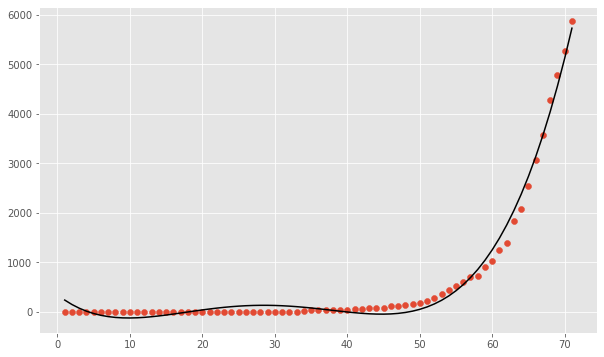

In [402]:
plt.figure(figsize=(10, 6))
plt.scatter(Days,y)

plt.plot(Days, y_hat , color='k')

plt.show()

In [400]:
y_hat.shape

(71,)

In [401]:
y.shape

(71,)

In [403]:
residual=y_hat-y

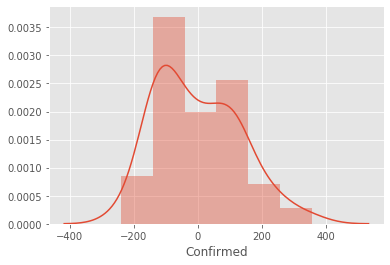

In [405]:
sns.distplot(residual)
plt.show()

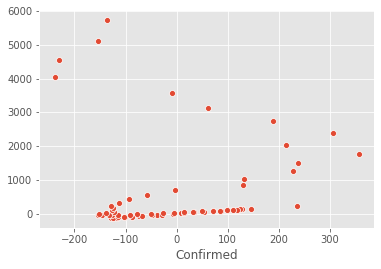

In [407]:
#residuals are normally distributed
sns.scatterplot(residual,y_hat)
plt.show()

In [408]:
df_cov['Days'] = np.arange(1, len(df_cov)+1)

In [410]:
df_cov

,Date,Confirmed,Days
0,2020-01-30,1.0,1
1,2020-01-31,1.0,2
2,2020-02-01,2.0,3
3,2020-02-02,3.0,4
4,2020-02-03,3.0,5
...,...,...,...
66,2020-04-05,3577.0,67
67,2020-04-06,4281.0,68
68,2020-04-07,4789.0,69
69,2020-04-08,5274.0,70


In [414]:
x=df_cov[['Days']]
y=df_cov['Confirmed']

In [415]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [416]:
lr.score(x,y)

0.43953018453060555

In [418]:
y_hat = lr.predict(x)

In [419]:
y_hat

array([-873.16079812, -830.87612341, -788.59144869, -746.30677398,
       -704.02209926, -661.73742455, -619.45274983, -577.16807512,
       -534.8834004 , -492.59872569, -450.31405097, -408.02937626,
       -365.74470154, -323.46002683, -281.17535211, -238.8906774 ,
       -196.60600268, -154.32132797, -112.03665325,  -69.75197854,
        -27.46730382,   14.81737089,   57.10204561,   99.38672032,
        141.67139504,  183.95606975,  226.24074447,  268.52541918,
        310.8100939 ,  353.09476861,  395.37944333,  437.66411804,
        479.94879276,  522.23346747,  564.51814219,  606.8028169 ,
        649.08749162,  691.37216633,  733.65684105,  775.94151576,
        818.22619048,  860.51086519,  902.79553991,  945.08021462,
        987.36488934, 1029.64956405, 1071.93423877, 1114.21891348,
       1156.5035882 , 1198.78826291, 1241.07293763, 1283.35761234,
       1325.64228706, 1367.92696177, 1410.21163649, 1452.4963112 ,
       1494.78098592, 1537.06566063, 1579.35033535, 1621.63501